## House Price Prediction Project

In [1]:
import pandas as pd

In [2]:
housing= pd.read_csv("Bookfinaldata.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
 %matplotlib inline

In [8]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## train-Test splitting

In [9]:
#for learning purpose
import numpy as np
# np.random.seed(42)
# def split_train_test(data,test_ratio):
#     shuffled=np.random.permutation(len(data))
#     test_set_size =int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)} \n Rows in test set:{len(test_set)} ")

In [12]:
# housing.shape
#total data point

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state= 42)
print(f"Rows in train set: {len(train_set)} \n Rows in test set:{len(test_set)} ")

Rows in train set: 404 
 Rows in test set:102 


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [15]:
print(train_index , end="@@@@@")
print(test_index)

[254 348 476 321 326 411 250 100 429  57 413 115 490 199 494 142 113 468
 400 247 151 408  68 365  81  93 456 116  27 234 140  47 382 377 366 185
  73 267 231 118  96  40 182 417 492 373 294 482  62 414 289  72 314  89
 129 157 110 343 200 310 462 361  95  37 145 227 166  23  85 281 285 264
 501 440 241 473   0 488 452 323 252 416 119  60 251 409 191  42 188 412
  92 353 292 107  12   3 364 339 301 467 376 280 309 202  61  24 122 164
 278 139  10 415 390 338 445 486 156 179 159  22 318 404 425  45  74 147
 431 215 434  44  83 144 500 406 161 331 243 293  86 162 458 359 295 124
 341 244 319 337  15 384 248 441 258  31 481 450 316  66  56 211 184 325
  41  11 262 491 177 369 249 238 125   5 224 235 334 165 475  63 437 497
 226  25  78 178 214 222 410 220  94 344  51 187 132  70 127 402  64 229
 306 298 432 163 117 327 175 442 141 111 120 427 503   8 311 282  75 276
 149 349 454 444 313 131 312   9 112 393 436   6 317  59 453 287  65 154
 308 189  35 392  33 484 447 403 299 499 270 464  9

In [16]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
housing = strat_train_set.copy()

In [18]:
housing.shape

(404, 14)

## Looking for correlation

In [19]:
corr_matrix = housing.corr()


In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

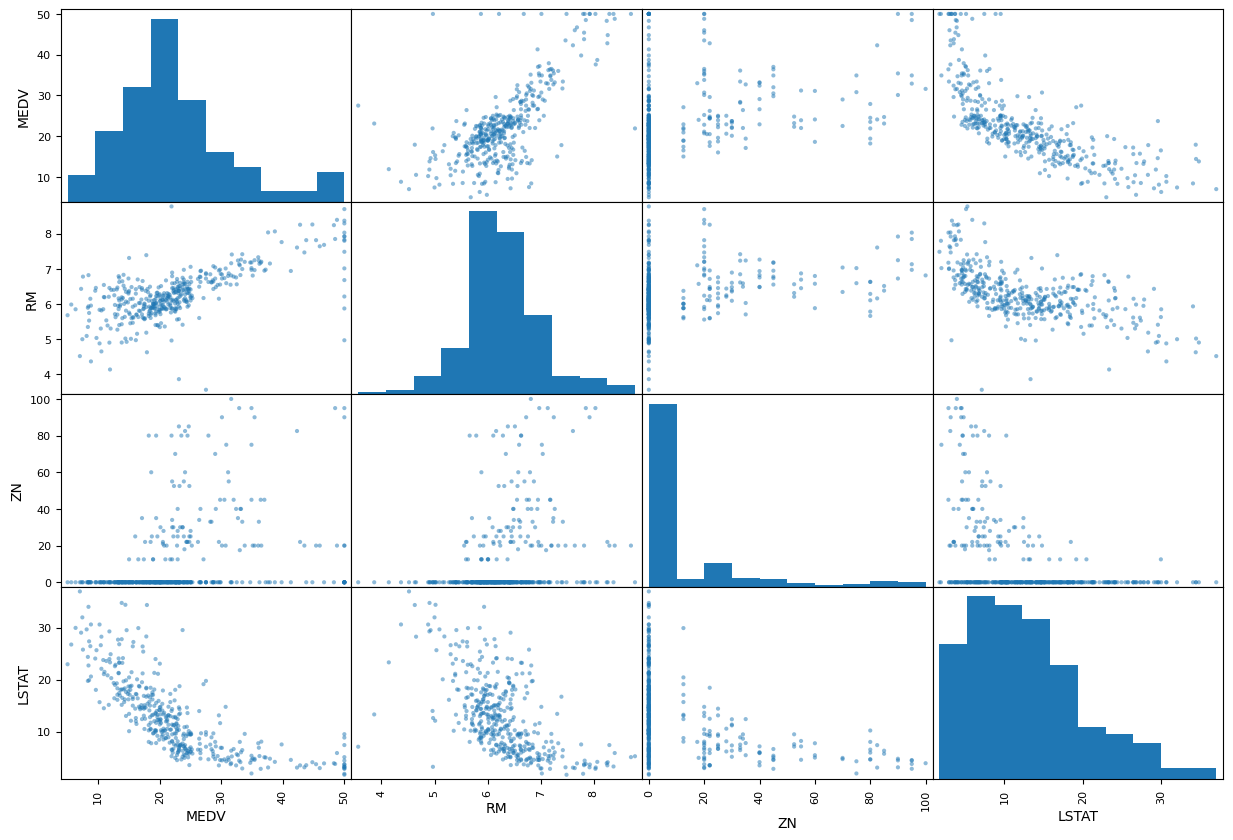

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (15,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

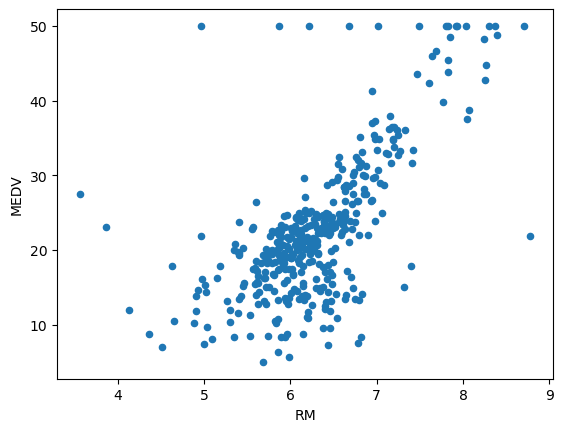

In [22]:
housing.plot(kind="scatter", x= 'RM', y= 'MEDV')

##  trying out new Attribute combination

In [23]:
housing['TAXRM']= housing['TAX']/ housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

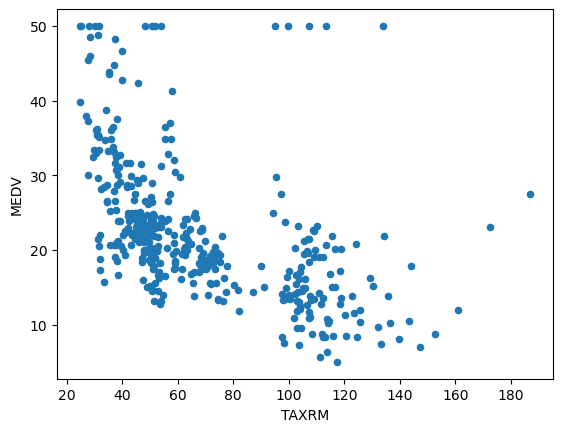

In [26]:
housing.plot(kind= 'scatter', x= 'TAXRM', y='MEDV')

In [27]:
housing= strat_train_set.drop("MEDV", axis =1)
housing_labels = strat_train_set["MEDV"].copy()


In [28]:
housing.shape

(404, 13)

In [29]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [30]:
# housing= strat_train_set.drop("MEDV", axis =1)
# housing_labels = strat_train_set["MEDV"].copy()

In [31]:
housing.shape

(404, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
x = imputer.transform(housing)


In [35]:
housing_tr = pd.DataFrame(x, columns= housing.columns)

In [36]:
housing_tr.shape

(404, 13)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## creating pipeline

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler())])

In [40]:
housing_num_tr= my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [42]:
housing_num_tr.shape


(404, 13)

## Taking a model - Linear Regression


In [43]:
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [44]:
some_data = housing.iloc[:5]


In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [49]:
##Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

4.829321492635759

## using better evaluation technique - Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

In [54]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation:", scores.std())

In [55]:
print_scores(rmse_scores)

scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Mean : 5.030437102767305
Standard Deviation: 1.060766115829484


# Saving the model

In [56]:
from joblib import dump, load
dump(model, "House_price_prediction.joblib")

['House_price_prediction.joblib']

# testing the model on the test data

In [57]:
x_test = strat_test_set.drop("MEDV", axis =1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared =  my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

[22.69663678 17.22600313 30.02303718 30.72767895  8.8510416  13.31467014
 17.29615732 17.74740541 32.49300647 36.05576682 16.37971118  0.55763712
 22.98231849 20.44805414 20.04676103 12.94089562 31.14959131 13.42383778
 25.02732037 24.1680579  20.41663802 17.05356046 17.82193794 25.60370774
 19.51063444 32.83523603 19.43372437 33.72021979  8.02922445 34.67322625
 19.51326153 21.4383898  29.31429776 16.35664997 26.98334343 18.35632929
 37.3141123  24.56541978 22.2186496  37.13515388 25.15918226 34.48919537
 23.4490451  24.01052594 18.52058894 32.69367712 38.47436972 21.39603535
 17.65060105 16.24434034 21.24195102 12.40190011 19.88486433 20.40554849
 27.94261106 33.08938174 40.13445849 31.36345155 14.94004062 19.73822665
 40.48290495 18.11543107 15.13757279 27.66353013 19.49519021 32.50860212
 23.40912101 20.30670328 21.16556351 33.78834117 34.10260096 27.63685041
 24.51460463 21.88751595 36.17309546  8.58176976 17.42620124 21.46806914
 20.54643262 23.00127296 25.98733788 22.55143049 14

In [58]:
final_rmse

4.143819554319327

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# using  the model

In [60]:
from joblib import dump, load
import numpy as np
model = load("Dragon.joblib")
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([23.94996896])